# Классификация СC50 превышает медианное значение

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Загрузка данных и разделение на выборки

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
target = 'SI'

In [32]:
df = pd.read_parquet("data/processed_data_full.parquet")

In [33]:
df["SI_gt_8"] = (df[target] > 8).astype(int)

In [34]:
np.mean(df["SI_gt_8"])

0.35671342685370744

сильного дисбаланса не наблюдается, однако присутствует смещение в сторону одного из классов

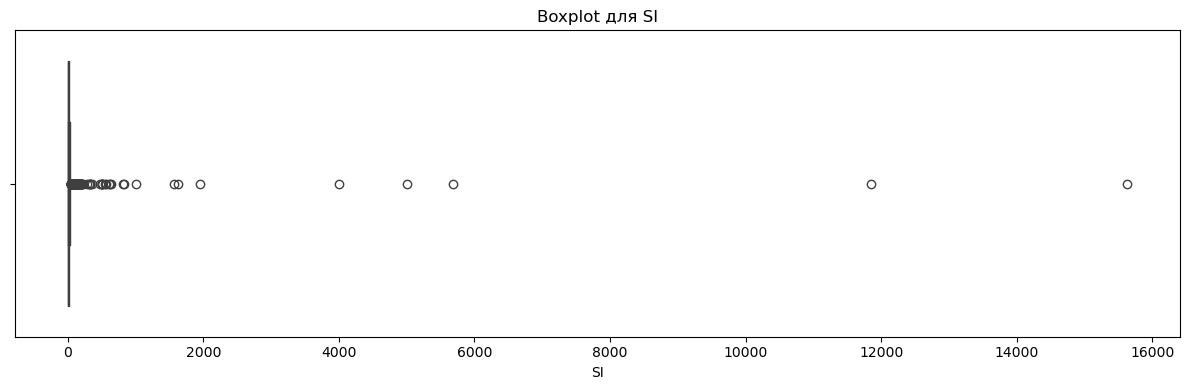

In [35]:
plt.figure(figsize=(12, 4))

sns.boxplot(x=df[target])

plt.title(f'Boxplot для {target}')
plt.tight_layout()
plt.show()

In [36]:
mean = df[target].mean()
std = df[target].std()
lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

outliers = df[(df[target] < lower_bound) | (df[target] > upper_bound)]

print("Выбросы по правилу 3 сигм:")
outliers

Выбросы по правилу 3 сигм:


,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,SI_gt_8
107,0.355556,-0.808845,0.580042,-0.047797,0.656361,-0.741293,0.972481,-0.660642,0.563687,-0.457965,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,0.393088,1965.439708,5000.000000,1
768,0.137385,-0.946394,-0.012520,0.417083,-0.258633,-0.505339,0.735449,-0.927678,1.487269,-0.461165,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,0.003517,19.999437,5687.000000,1
770,0.137385,-0.946394,-0.012520,0.417083,-0.258633,-0.505339,0.735449,-0.927678,1.487269,-0.461165,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,0.021100,250.001758,11848.333333,1
793,0.339732,-0.708292,0.344044,0.519138,-0.371195,-0.284410,0.754228,-0.726871,0.920526,-0.458852,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,0.032009,128.090060,4001.700000,1
796,0.339732,-0.708292,0.344044,0.519138,-0.371195,-0.284410,0.754228,-0.726871,0.920526,-0.458852,...,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,0.016004,249.999200,15620.600000,1


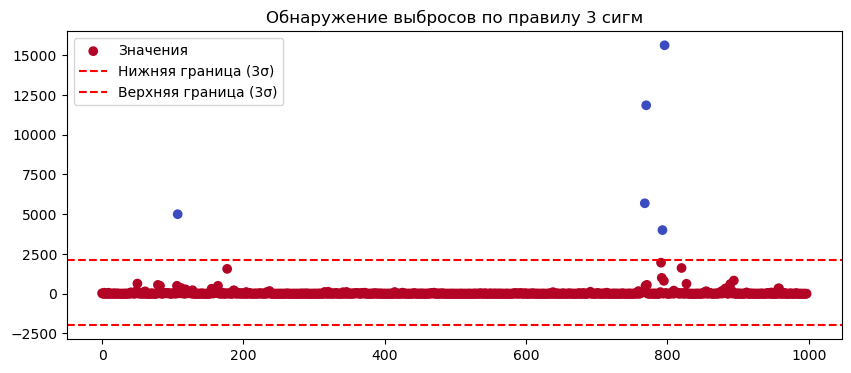

In [37]:
df['is_outlier_3σ'] = (df[target] < lower_bound) | (df[target] > upper_bound)

plt.figure(figsize=(10, 4))
plt.scatter(df.index, df[target], c=~df['is_outlier_3σ'], cmap='coolwarm', label='Значения')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Нижняя граница (3σ)')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Верхняя граница (3σ)')
plt.legend()
plt.title('Обнаружение выбросов по правилу 3 сигм')
plt.show()

In [38]:
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df["is_outlier_IQR"] = (df[target] < lower_bound) | (df[target] > upper_bound)
df[(df[target] < lower_bound) | (df[target] > upper_bound)]

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,SI_gt_8,is_outlier_3σ,is_outlier_IQR
3,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.234453,-0.274647,3.119291,-0.084045,1.705624,107.855654,63.235294,1,False,True
9,-1.417714,0.345653,0.758468,-0.666417,0.539312,0.946275,-0.840004,-0.657698,-2.253237,-0.462484,...,-0.234453,-0.274647,-0.168855,-0.084045,6.400847,400.906360,62.633333,1,False,True
41,-1.732405,1.222549,0.851581,-0.772814,1.052557,0.284504,-1.522105,1.500099,-2.075118,-0.576677,...,-0.234453,-0.274647,2.297254,-0.084045,15.078486,1344.065056,89.137931,1,False,True
44,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.234453,-0.274647,3.119291,-0.084045,22.825266,1254.135512,54.945055,1,False,True
47,-1.727458,1.290243,0.858769,-1.607705,0.623477,0.947291,-1.522105,1.500099,-2.546610,-0.576794,...,-0.234453,-0.274647,7.229473,-0.084045,45.006900,2216.216562,49.241706,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,0.659083,0.730976,-0.432297,0.560932,-0.624908,-0.426982,0.861013,-0.437833,-0.779704,-0.445203,...,-0.234453,-0.274647,-0.168855,-0.084045,6.299480,500.000000,79.371629,1,False,True
957,-1.609520,1.295864,0.859366,1.527934,0.515013,-0.268314,-0.457250,0.689062,0.164868,0.615412,...,-0.234453,3.641036,-0.168855,-0.084045,0.298932,99.999046,334.521277,1,False,True
958,-1.609520,1.295864,0.859366,1.527934,0.515013,-0.268314,-0.457250,0.689062,0.164868,0.615412,...,-0.234453,3.641036,-0.168855,-0.084045,0.298932,99.999046,334.521277,1,False,True
966,1.170154,-0.602861,-0.278145,-1.496614,-1.134865,2.459102,1.330155,-0.809777,-1.110305,-0.279200,...,-0.234453,-0.274647,-0.168855,-0.084045,1.900747,99.999546,52.610669,1,False,True


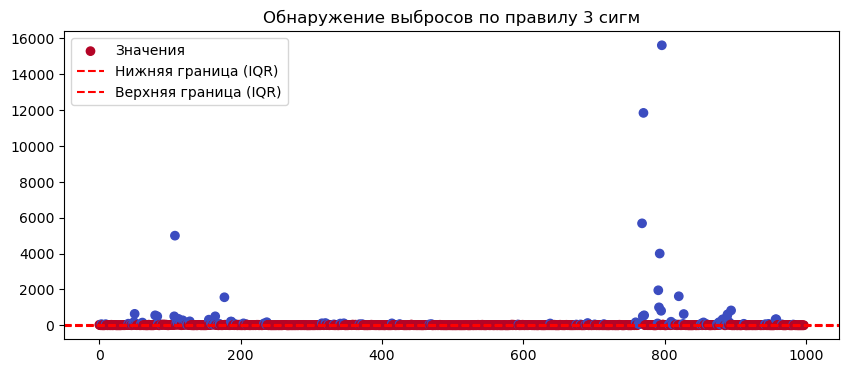

In [39]:
plt.figure(figsize=(10, 4))
plt.scatter(df.index, df[target], c=~df['is_outlier_IQR'], cmap='coolwarm', label='Значения')
plt.axhline(y=lower_bound, color='r', linestyle='--', label='Нижняя граница (IQR)')
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Верхняя граница (IQR)')
plt.legend()
plt.title('Обнаружение выбросов по правилу 3 сигм')
plt.show()

Отбросим выбросов по 3-м сигмам значительно меньше, чем по правилу Тьюки. 

Данные распределены близко к нормальному распределнию, следовательно отбросим выбросы по 3 sigma

In [40]:
df

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI,SI_gt_8,is_outlier_3σ,is_outlier_IQR
0,-1.732405,1.222549,0.851581,-0.772814,1.052557,0.284504,-1.522105,1.500099,-2.075118,-0.576677,...,-0.234453,-0.274647,2.297254,-0.084045,6.239374,175.482382,28.125000,1,False,False
1,-2.074548,2.091417,0.943841,-0.560001,1.232249,0.316257,-1.722757,1.238276,-2.223551,-0.566152,...,-0.234453,-0.274647,2.297254,-0.084045,0.771831,5.402819,7.000000,0,False,False
2,-2.477594,2.146889,0.949731,-1.510821,0.994298,0.773991,-1.089544,1.078060,-2.409092,-0.540065,...,-0.234453,-0.274647,2.297254,-0.084045,223.808778,161.142320,0.720000,0,False,False
3,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.234453,-0.274647,3.119291,-0.084045,1.705624,107.855654,63.235294,1,False,True
4,-1.715364,0.530810,0.778129,-0.717729,0.548297,0.930745,-1.336166,1.977954,-2.253237,-0.576068,...,-0.234453,-0.274647,-0.168855,-0.084045,107.131532,139.270991,1.300000,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.636029,-0.787198,0.308399,-0.936087,1.540346,0.519892,0.634955,-0.805298,-0.036641,-0.455162,...,-0.234453,-0.274647,-0.168855,-0.084045,31.000104,34.999650,1.129017,0,False,False
994,0.847612,-0.892065,0.167966,-0.998958,1.179465,1.079648,0.709726,-0.790893,-0.234551,-0.455160,...,-0.234453,-0.274647,-0.168855,-0.084045,31.999934,33.999415,1.062484,0,False,False
995,0.955251,-0.914547,0.198520,-1.397599,0.977489,1.553108,0.712233,-0.790785,0.065439,0.617677,...,-0.234453,-0.274647,-0.168855,-0.084045,30.999883,33.999458,1.096761,0,False,False
996,0.906465,-0.203625,-0.278284,-0.941713,0.743712,1.371138,0.593365,-0.807503,-1.601738,-0.458386,...,-0.234453,-0.274647,-0.168855,-0.084045,31.998959,32.999644,1.031272,0,False,False


In [41]:
target_old = target
target = "SI_gt_8"

In [42]:
# data_cleaned_IQR = df[~df['is_outlier_IQR']].drop(columns=['is_outlier_IQR', 'is_outlier_3σ'])
data_cleaned_IQR = df[~df['is_outlier_3σ']].drop(columns=['is_outlier_IQR', 'is_outlier_3σ', target_old])

data_cleaned_IQR

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea,"IC50, mM","CC50, mM",SI_gt_8
0,-1.732405,1.222549,0.851581,-0.772814,1.052557,0.284504,-1.522105,1.500099,-2.075118,-0.576677,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,6.239374,175.482382,1
1,-2.074548,2.091417,0.943841,-0.560001,1.232249,0.316257,-1.722757,1.238276,-2.223551,-0.566152,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,0.771831,5.402819,0
2,-2.477594,2.146889,0.949731,-1.510821,0.994298,0.773991,-1.089544,1.078060,-2.409092,-0.540065,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045,223.808778,161.142320,0
3,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,3.119291,-0.084045,1.705624,107.855654,1
4,-1.715364,0.530810,0.778129,-0.717729,0.548297,0.930745,-1.336166,1.977954,-2.253237,-0.576068,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,107.131532,139.270991,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.636029,-0.787198,0.308399,-0.936087,1.540346,0.519892,0.634955,-0.805298,-0.036641,-0.455162,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.000104,34.999650,0
994,0.847612,-0.892065,0.167966,-0.998958,1.179465,1.079648,0.709726,-0.790893,-0.234551,-0.455160,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.999934,33.999415,0
995,0.955251,-0.914547,0.198520,-1.397599,0.977489,1.553108,0.712233,-0.790785,0.065439,0.617677,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,30.999883,33.999458,0
996,0.906465,-0.203625,-0.278284,-0.941713,0.743712,1.371138,0.593365,-0.807503,-1.601738,-0.458386,...,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045,31.998959,32.999644,0


In [43]:
X = data_cleaned_IQR[data_cleaned_IQR.columns[:-3]]
y_ic50 = data_cleaned_IQR[target]

In [44]:
X

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,MinPartialCharge,FpDensityMorgan1,BCUT2D_MWHI,...,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea
0,-1.732405,1.222549,0.851581,-0.772814,1.052557,0.284504,-1.522105,1.500099,-2.075118,-0.576677,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045
1,-2.074548,2.091417,0.943841,-0.560001,1.232249,0.316257,-1.722757,1.238276,-2.223551,-0.566152,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045
2,-2.477594,2.146889,0.949731,-1.510821,0.994298,0.773991,-1.089544,1.078060,-2.409092,-0.540065,...,6.406778,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,2.297254,-0.084045
3,-1.731419,1.242563,0.853706,-0.959234,0.968714,0.394969,-1.522105,1.500099,-2.167248,-0.576750,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,3.119291,-0.084045
4,-1.715364,0.530810,0.778129,-0.717729,0.548297,0.930745,-1.336166,1.977954,-2.253237,-0.576068,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,0.636029,-0.787198,0.308399,-0.936087,1.540346,0.519892,0.634955,-0.805298,-0.036641,-0.455162,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045
994,0.847612,-0.892065,0.167966,-0.998958,1.179465,1.079648,0.709726,-0.790893,-0.234551,-0.455160,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045
995,0.955251,-0.914547,0.198520,-1.397599,0.977489,1.553108,0.712233,-0.790785,0.065439,0.617677,...,-0.181542,3.676931,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045
996,0.906465,-0.203625,-0.278284,-0.941713,0.743712,1.371138,0.593365,-0.807503,-1.601738,-0.458386,...,-0.181542,-0.206219,-0.110319,-0.095394,-0.03167,-0.03167,-0.234453,-0.274647,-0.168855,-0.084045


In [45]:
y_ic50

0      1
1      0
2      0
3      1
4      0
      ..
993    0
994    0
995    0
996    0
997    0
Name: SI_gt_8, Length: 993, dtype: int64

In [46]:
X_train, X_test, y_train_ic50, y_test_ic50 = train_test_split(
    X, y_ic50, test_size=0.15, random_state=42
)

In [47]:
class_ratio = np.mean(y_train_ic50)
print(f"Баланс классов: {class_ratio:.2f} / {1-class_ratio:.2f}")

Баланс классов: 0.35 / 0.65


## Инициализация моделей и метрик

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import (roc_auc_score, f1_score, precision_score, 
                             recall_score, confusion_matrix, roc_curve)
import numpy as np

In [49]:
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [50]:
MODELS = {
    'logreg': LogisticRegression(random_state=RANDOM_STATE),
    'rf': RandomForestClassifier(random_state=RANDOM_STATE),
    'xgb': XGBClassifier(random_state=RANDOM_STATE),
}

metrics = {
    'ROC-AUC': roc_auc_score,
    'F1': lambda y_true, y_pred: f1_score(y_true, y_pred, average='binary'),
    'PRECISION': lambda y_true, y_pred: precision_score(y_true, y_pred, average='binary'),
    'RECALL': lambda y_true, y_pred: recall_score(y_true, y_pred, average='binary')
}

## Бейзлайн

Проверим перечисленные модели

In [ ]:
results = []

for name, model in MODELS.items():
    cv_scores = cross_val_score(model, X_train, y_train_ic50,
                               cv=5, scoring='roc_auc', n_jobs=-1)
    
    model.fit(X_train, y_train_ic50)
    
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    model_metrics = {}
    for metric_name, metric_func in metrics.items():
        if metric_name == 'ROC-AUC':
            model_metrics[metric_name] = metric_func(y_test_ic50, y_proba)
        else:
            model_metrics[metric_name] = metric_func(y_test_ic50, y_pred)

    results.append({
        'model': name,
        'cv_mean_roc_auc': np.mean(cv_scores),
        'cv_std_roc_auc': np.std(cv_scores),
        **model_metrics
    })

results_df = pd.DataFrame(results)
print(results_df)

/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

    model  cv_mean_roc_auc  cv_std_roc_auc   ROC-AUC        F1  PRECISION  \
0  logreg         0.696637        0.044052  0.688778  0.543478   0.641026   
1      rf         0.735160        0.021312  0.752064  0.571429   0.684211   
2     xgb         0.716203        0.014639  0.746954  0.571429   0.622222   

     RECALL  
0  0.471698  
1  0.490566  
2  0.528302  


Как видно, деревья и SVR дают лучшие результаты.

Попробуем оптимизировать их с помощью подбора гиперпараметров

Из-за дисбаланса классов заменим LR на LightGBM. Гипотеза: LightGBM должна лучше всего справится с этой задачей из-за встроенной подержки работы с дисбалансом

## Оптимизация

Будем оптимизировать при помощи Optuna

In [52]:
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import joblib
import matplotlib.pyplot as plt
import lightgbm as lgb

In [ ]:
N_TRIALS_LGB = 100
CV_FOLDS_LGB = 10

N_TRIALS_RF = 100
CV_FOLDS_RF = 10

N_TRIALS_XGB = 100
CV_FOLDS_XGB = 10

### LightGBM

In [54]:
def optimize_lgb(trial):
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 20, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.5, 3.0),
        'random_state': 42,
        'n_jobs': -1,
        'verbose': -1
    }

    model = lgb.LGBMClassifier(**params)

    scores = cross_val_score(
        model, X_train, y_train_ic50,
        cv=CV_FOLDS_LGB,
        scoring='roc_auc',
        n_jobs=-1
    )

    return scores.mean()

In [55]:
study_lgb = optuna.create_study(
        direction='maximize',
        sampler=TPESampler(seed=RANDOM_STATE)
        )
study_lgb.optimize(optimize_lgb, n_trials=N_TRIALS_LGB, n_jobs=1)

[I 2025-06-03 14:24:09,096] A new study created in memory with name: no-name-f90ab556-4589-4a89-8576-6ba402db65c7
[I 2025-06-03 14:24:30,061] Trial 0 finished with value: 0.7421435427067611 and parameters: {'boosting_type': 'dart', 'n_estimators': 759, 'learning_rate': 0.07661100707771368, 'num_leaves': 63, 'max_depth': 4, 'min_child_samples': 10, 'subsample': 0.9464704583099741, 'colsample_bytree': 0.8404460046972835, 'reg_alpha': 7.080725777960454, 'reg_lambda': 0.20584494295802447, 'scale_pos_weight': 2.9247746304049858}. Best is trial 0 with value: 0.7421435427067611.
[I 2025-06-03 14:24:34,323] Trial 1 finished with value: 0.7410351019776307 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 263, 'learning_rate': 0.018659959624904923, 'num_leaves': 105, 'max_depth': 8, 'min_child_samples': 46, 'subsample': 0.7164916560792167, 'colsample_bytree': 0.8447411578889518, 'reg_alpha': 1.3949386065204183, 'reg_lambda': 2.9214464853521815, 'scale_pos_weight': 1.4159046082342293}. Be

In [56]:
print(f"Лучшие параметры для LightGBM:")
print(study_lgb.best_params)
print(f"Лучший ROC-AUC: {study_lgb.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_lgb)
fig.show()

fig = optuna.visualization.plot_param_importances(study_lgb)
fig.show()

Лучшие параметры для LightGBM:
{'boosting_type': 'dart', 'n_estimators': 455, 'learning_rate': 0.029542647362386733, 'num_leaves': 292, 'max_depth': 10, 'min_child_samples': 25, 'subsample': 0.653722311776922, 'colsample_bytree': 0.8132992897798335, 'reg_alpha': 5.333671220405906, 'reg_lambda': 2.7019283536798926, 'scale_pos_weight': 2.1860901555172463}
Лучший ROC-AUC: 0.7504


In [57]:
best_params_lgb = study_lgb.best_params
best_lgb_model = lgb.LGBMClassifier(**best_params_lgb)

In [58]:
best_lgb_model.fit(X_train, y_train_ic50)
y_proba_lgb = best_lgb_model.predict_proba(X_test)[:, 1]
y_pred_lgb = best_lgb_model.predict(X_test)

[LightGBM] [Info] Number of positive: 298, number of negative: 546
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11092
[LightGBM] [Info] Number of data points in the train set: 844, number of used features: 120
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353081 -> initscore=-0.605525
[LightGBM] [Info] Start training from score -0.605525
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [59]:
final_metrics_lgb = {
    'roc_auc': roc_auc_score(y_test_ic50, y_proba_lgb),
    'f1': f1_score(y_test_ic50, y_pred_lgb),
    'precision': precision_score(y_test_ic50, y_pred_lgb),
    'recall': recall_score(y_test_ic50, y_pred_lgb),
    'accuracy': (y_pred_lgb == y_test_ic50).mean()
}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_lgb.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
roc_auc: 0.7322
f1: 0.6182
precision: 0.5965
recall: 0.6415
accuracy: 0.7181


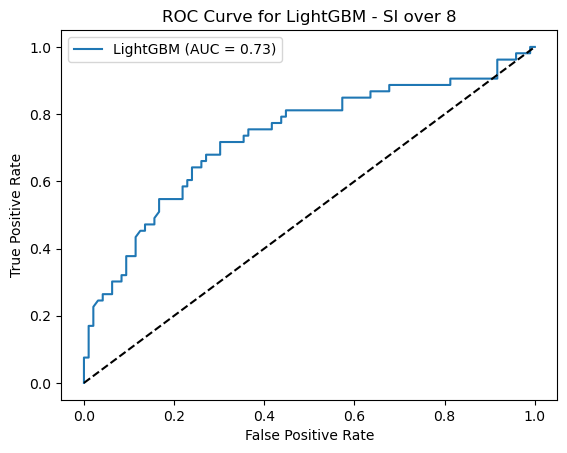

In [60]:
fpr, tpr, _ = roc_curve(y_test_ic50, y_proba_lgb)
plt.figure()
plt.plot(fpr, tpr, label=f'LightGBM (AUC = {final_metrics_lgb["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for LightGBM - SI over 8')
plt.legend()

Text(0.5, 1.0, 'Confusion Matrix: Logistic Regression - SI over 8')

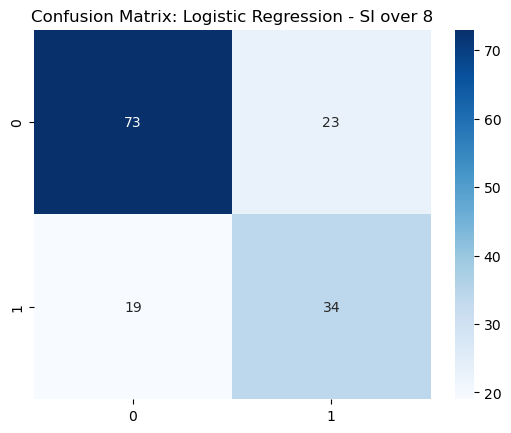

In [61]:
cm = confusion_matrix(y_test_ic50, y_pred_lgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: Logistic Regression - SI over 8')

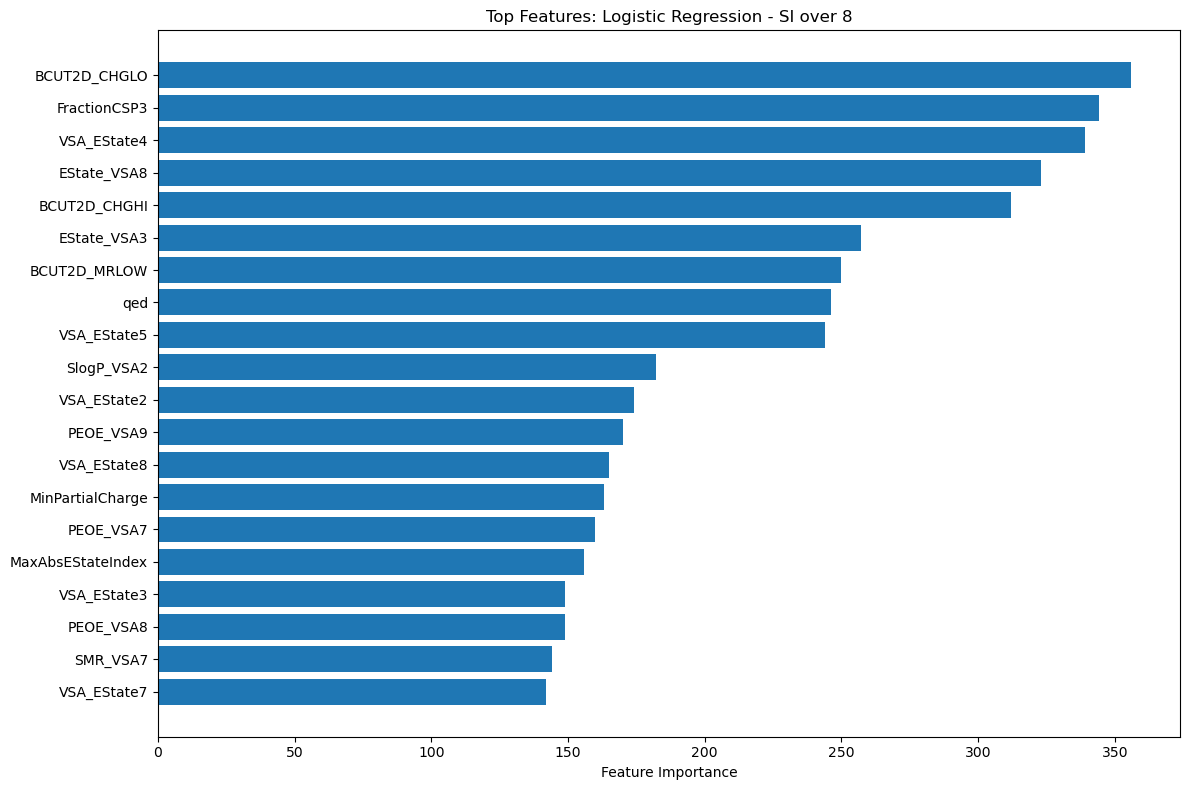

In [62]:
if hasattr(best_lgb_model, 'feature_importances_'):
    importances = best_lgb_model.feature_importances_
    sorted_idx = importances.argsort()[::-1]
    top_features = min(20, X.shape[1])
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), X.columns[sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title(f'Top Features: Logistic Regression - SI over 8')
    plt.tight_layout()

### Random Forest

In [63]:
def optimize_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 5, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': True,
        'random_state': RANDOM_STATE,
        'n_jobs': -1
    }
    model = RandomForestClassifier(**params)
    return cross_val_score(
        model, X_train, y_train_ic50, cv=CV_FOLDS_RF, scoring='roc_auc', n_jobs=-1
    ).mean()

In [64]:
study_rf = optuna.create_study(
        direction='maximize',
        sampler=TPESampler(seed=RANDOM_STATE)
        )
study_rf.optimize(optimize_rf, n_trials=N_TRIALS_RF, n_jobs=1)

[I 2025-06-03 14:43:29,303] A new study created in memory with name: no-name-8f1ff860-384a-406d-925c-431571162831
[I 2025-06-03 14:43:30,559] Trial 0 finished with value: 0.7453116219667943 and parameters: {'n_estimators': 437, 'max_depth': 29, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.7453116219667943.
[I 2025-06-03 14:43:30,931] Trial 1 finished with value: 0.7467050195441001 and parameters: {'n_estimators': 152, 'max_depth': 27, 'min_samples_split': 13, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 1 with value: 0.7467050195441001.
[I 2025-06-03 14:43:33,216] Trial 2 finished with value: 0.7473939393939394 and parameters: {'n_estimators': 850, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 2 with value: 0.7473939393939394.
[I 2025-06-03 14:43:34,412] Trial 3 finished with value: 0.7441709818491427 and parameters: {'n_estimators': 489, 'max_depth': 12, 

In [65]:
print(f"Лучшие параметры для Random Forest:")
print(study_rf.best_params)
print(f"Лучший ROC-AUC: {study_rf.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_rf)
fig.show()

fig = optuna.visualization.plot_param_importances(study_rf)
fig.show()

Лучшие параметры для Random Forest:
{'n_estimators': 197, 'max_depth': 15, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
Лучший ROC-AUC: 0.7506


In [66]:
best_params_rf = study_rf.best_params
best_rf_model = RandomForestClassifier(**best_params_rf)

In [67]:
best_rf_model.fit(X_train, y_train_ic50)
y_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
y_pred_rf = best_rf_model.predict(X_test)

In [68]:
final_metrics_rf = {
    'roc_auc': roc_auc_score(y_test_ic50, y_proba_rf),
    'f1': f1_score(y_test_ic50, y_pred_rf),
    'precision': precision_score(y_test_ic50, y_pred_rf),
    'recall': recall_score(y_test_ic50, y_pred_rf),
    'accuracy': (y_pred_rf == y_test_ic50).mean()
}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_rf.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
roc_auc: 0.7405
f1: 0.5116
precision: 0.6667
recall: 0.4151
accuracy: 0.7181


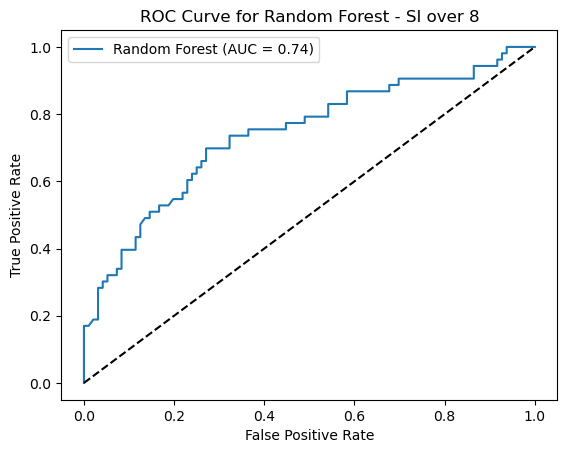

In [69]:
fpr, tpr, _ = roc_curve(y_test_ic50, y_proba_rf)
plt.figure()
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {final_metrics_rf["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for Random Forest - SI over 8')
plt.legend()

Text(0.5, 1.0, 'Confusion Matrix: Random Forest - SI over 8')

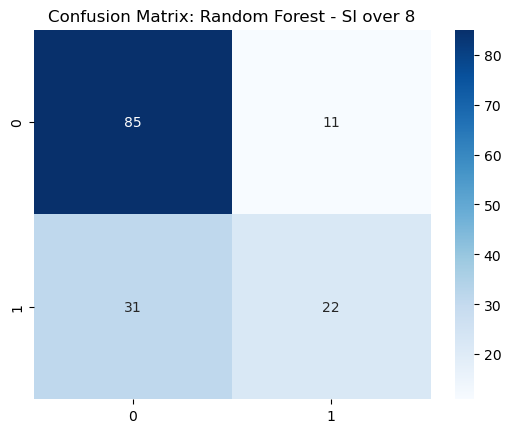

In [70]:
cm = confusion_matrix(y_test_ic50, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: Random Forest - SI over 8')

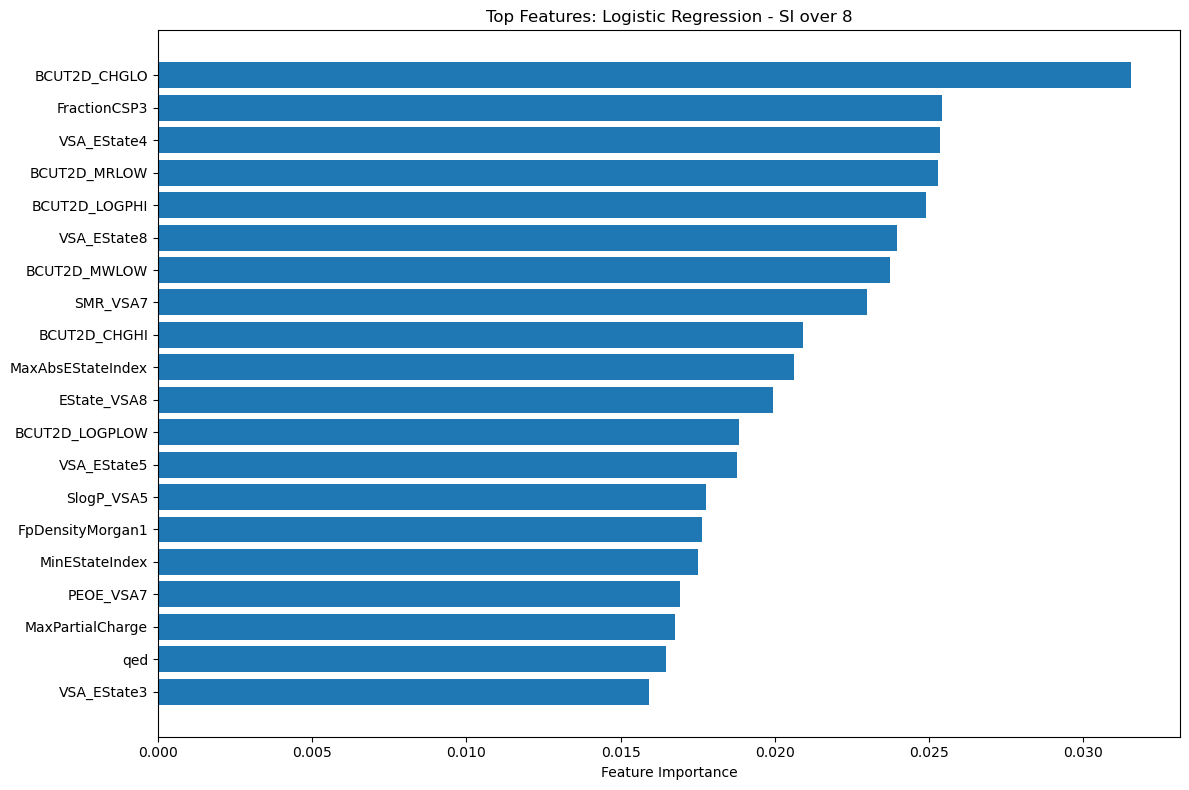

In [71]:
if hasattr(best_rf_model, 'feature_importances_'):
    importances = best_rf_model.feature_importances_
    sorted_idx = importances.argsort()[::-1]
    top_features = min(20, X.shape[1])
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), X.columns[sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title(f'Top Features: Logistic Regression - SI over 8')
    plt.tight_layout()

### XGBoost

In [72]:
def optimize_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'use_label_encoder': False,
        'eval_metric': 'auc',
        'random_state': RANDOM_STATE
    }
    model = XGBClassifier(**params)
    return cross_val_score(
        model, X_train, y_train_ic50, cv=CV_FOLDS_XGB, scoring='roc_auc', n_jobs=-1
    ).mean()

In [73]:
study_xgb = optuna.create_study(
        direction='maximize',
        sampler=TPESampler(seed=RANDOM_STATE)
        )
study_xgb.optimize(optimize_xgb, n_trials=N_TRIALS_RF, n_jobs=1)

[I 2025-06-03 14:45:29,099] A new study created in memory with name: no-name-d984d511-225a-495a-842c-9779b2091c2e
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:45:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1748292887431/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:45:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1748292887431/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [14:45:29] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1748292887431/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iterat

In [74]:
print(f"Лучшие параметры для XGBoost:")
print(study_xgb.best_params)
print(f"Лучший ROC-AUC: {study_xgb.best_value:.4f}")

fig = optuna.visualization.plot_optimization_history(study_xgb)
fig.show()

fig = optuna.visualization.plot_param_importances(study_xgb)
fig.show()

Лучшие параметры для XGBoost:
{'n_estimators': 754, 'max_depth': 10, 'learning_rate': 0.010931962367952701, 'subsample': 0.7884749440034766, 'colsample_bytree': 0.9709402234432307, 'gamma': 0.08081541316870917, 'reg_alpha': 4.01185914019829, 'reg_lambda': 1.4849965086220545}
Лучший ROC-AUC: 0.7485


In [75]:
best_params_xgb = study_xgb.best_params
best_xgb_model = XGBClassifier(**best_params_xgb)

In [76]:
best_xgb_model.fit(X_train, y_train_ic50)
y_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = best_xgb_model.predict(X_test)

In [77]:
final_metrics_xgb = {
    'roc_auc': roc_auc_score(y_test_ic50, y_proba_xgb),
    'f1': f1_score(y_test_ic50, y_pred_xgb),
    'precision': precision_score(y_test_ic50, y_pred_xgb),
    'recall': recall_score(y_test_ic50, y_pred_xgb),
    'accuracy': (y_pred_xgb == y_test_ic50).mean()
}

print("\nFinal Metrics on Test Set:")
for metric, value in final_metrics_rf.items():
    print(f"{metric}: {value:.4f}")


Final Metrics on Test Set:
roc_auc: 0.7405
f1: 0.5116
precision: 0.6667
recall: 0.4151
accuracy: 0.7181


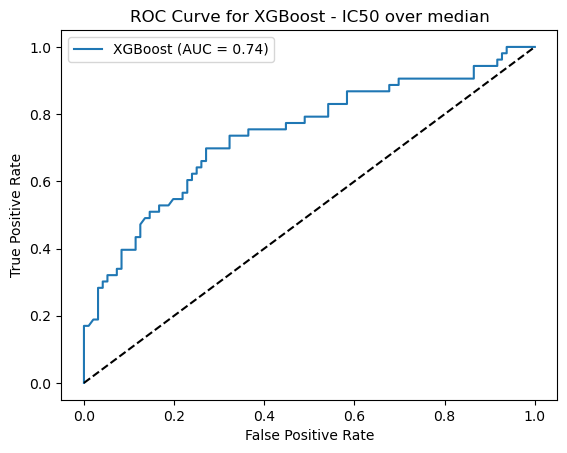

In [78]:
fpr, tpr, _ = roc_curve(y_test_ic50, y_proba_rf)
plt.figure()
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {final_metrics_rf["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for XGBoost - IC50 over median')
plt.legend()

Text(0.5, 1.0, 'Confusion Matrix: Random Forest - SI over 8')

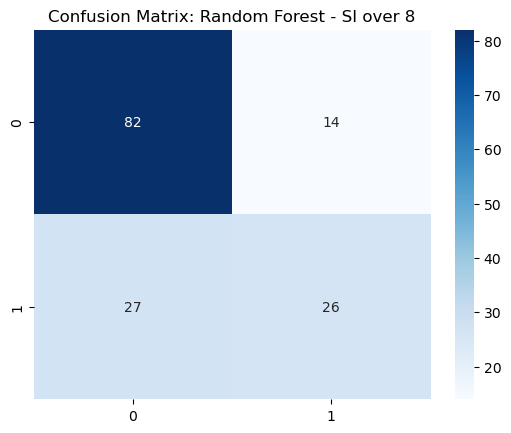

In [79]:
cm = confusion_matrix(y_test_ic50, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix: Random Forest - SI over 8')

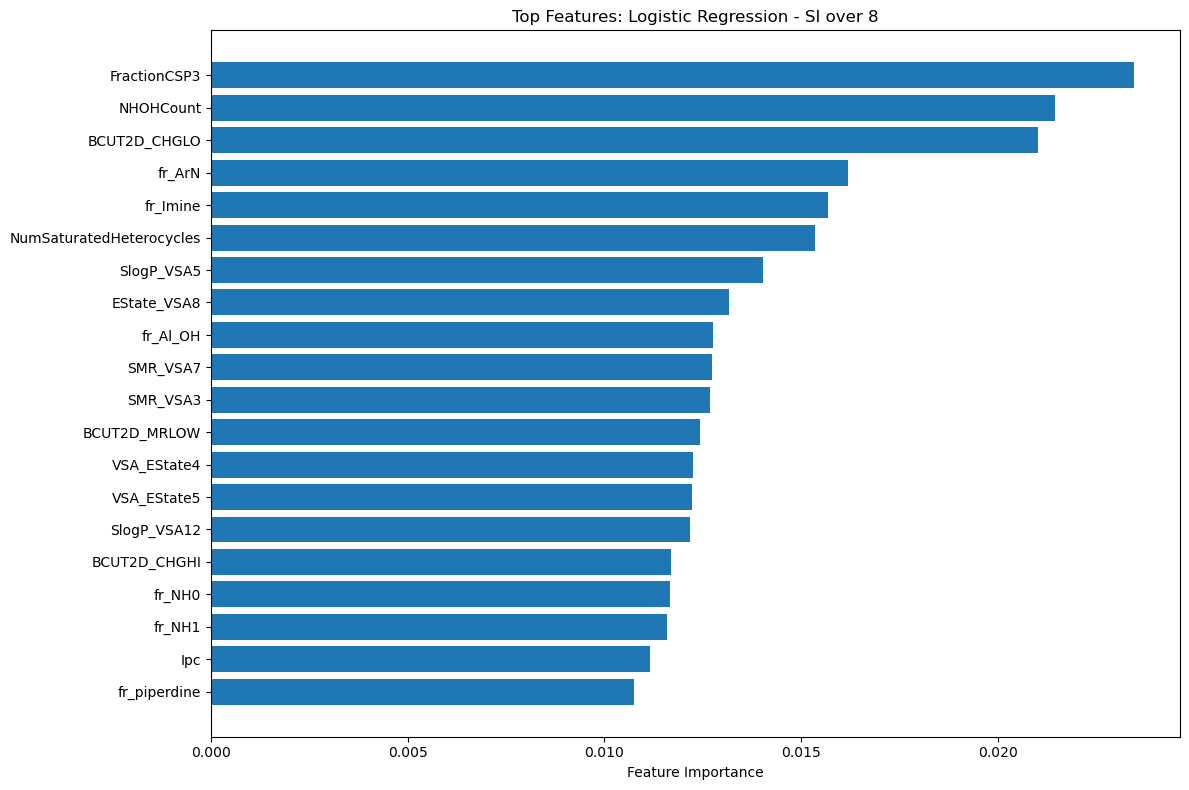

In [80]:
if hasattr(best_xgb_model, 'feature_importances_'):
    importances = best_xgb_model.feature_importances_
    sorted_idx = importances.argsort()[::-1]
    top_features = min(20, X.shape[1])
    
    plt.figure(figsize=(12, 8))
    plt.barh(range(top_features), importances[sorted_idx][:top_features], align='center')
    plt.yticks(range(top_features), X.columns[sorted_idx[:top_features]])
    plt.gca().invert_yaxis()
    plt.xlabel('Feature Importance')
    plt.title(f'Top Features: Logistic Regression - SI over 8')
    plt.tight_layout()

## Сравнение моделей

In [84]:
metrics_comparisson = {
    "LGB": final_metrics_lgb,
    "RF": final_metrics_rf,
    "XGB": final_metrics_xgb,
}

df_metrics = pd.DataFrame(metrics_comparisson)

In [85]:
df_metrics

,LGB,RF,XGB
roc_auc,0.732213,0.740468,0.741057
f1,0.618182,0.511628,0.559140
precision,0.596491,0.666667,0.650000
recall,0.641509,0.415094,0.490566
accuracy,0.718121,0.718121,0.724832


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/opt/anaconda3/envs/arima-env/lib/python3.11/site-packages/seaborn/axisgrid.py:854: FutureWarning:



Th

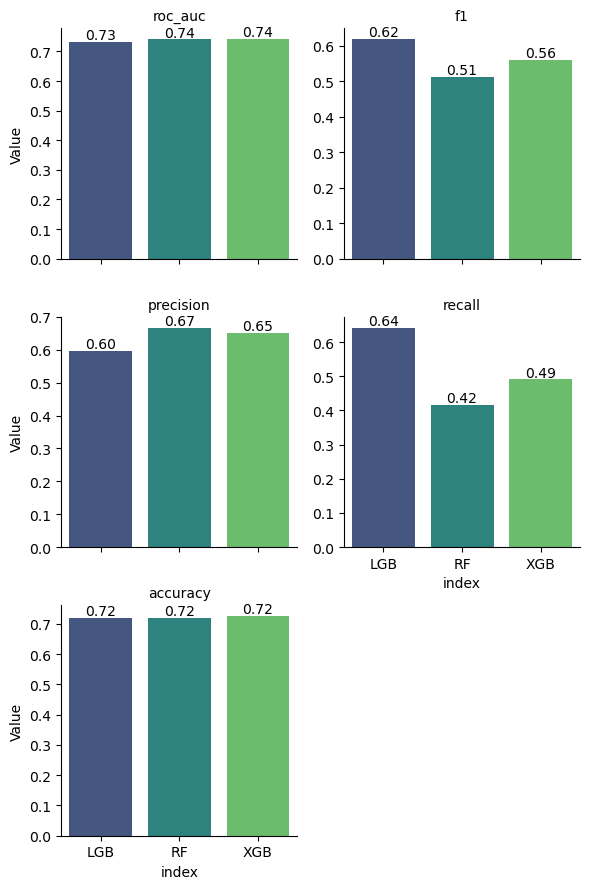

In [86]:
plot_data = df_metrics.T.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')

palette = sns.color_palette("viridis", n_colors=len(plot_data['index'].unique()))

g = sns.FacetGrid(plot_data, col="Metric", col_wrap=2, sharey=False)
g.map_dataframe(sns.barplot, x="index", y="Value", palette=palette, ci=None)
g.set_titles("{col_name}")

for ax in g.axes:
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

g.tight_layout()
plt.show()

Как видно, модель LGB в совокупности даёт лучшие результаты: она эффективнее остальных находит положительные примеры, не жертвуя точностью слишком сильно.